In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, names=['Population', 'Profit']) #加载数据
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 1.Plotting the Data

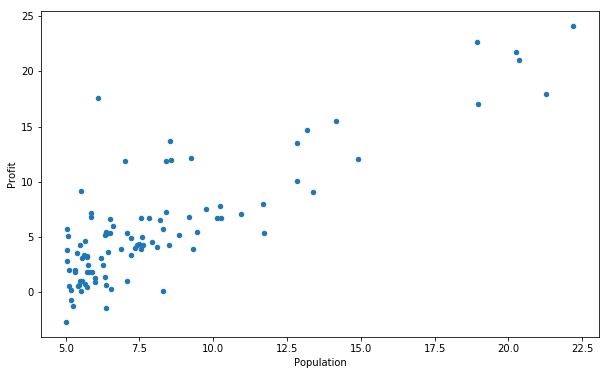

In [4]:
# plt.figure(figsize=(12, 8))
# plt.xlim(0, 24)
# plt.ylim(0, 25)
# plt.scatter(data.loc[:, 'Population'], data.loc[:, 'Profit']) #两者效果一致或者data.Population
# plt.xticks设置刻度


data.plot(kind='scatter', x='Population', y='Profit', figsize=(10, 6))
plt.show()

## 2.Computing Cost

In [5]:
def computeCost(X, y, theta):
    m = len(y)                     #len(X) 也行
    cost = 1. / (2 * m) * np.sum((np.dot(X, theta) - y) **2)   #theta列向量
    return cost

In [9]:
data.insert(0, 'Ones', 1)     #插入1
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [29]:
colums = data.shape[1]
X = data.iloc[:, :colums-1] #前开后闭
y = data.iloc[:, colums-1:colums]

In [11]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [13]:
X = np.array(X)
y = np.array(y)
theta = np.zeros((2, 1)) #初始化

In [14]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [15]:
computeCost(X, y, theta) #验证是否计算正确

32.072733877455676

## 3.Batch Gradent Descent

### 3.1 执行梯度下降算法

In [16]:
def updateTheta(X, y, theta, alpha):
    m = len(y)
    error = np.dot(X, theta) - y
    update = 1. / m * alpha * np.dot(X.T, error)  #利用矩阵求导,与常规方式不同，更节省时间
    return update

In [107]:
def gradetDescent(X, y, theta, iterations=1500, alpha=0.01): #alpha=0.01, iterations=1500 从官方文档里面来
    cost_list = []
    for i in range(iterations):
        cost = computeCost(X, y, theta)
        cost_list.append(cost)
#         if i % 100 == 0:
#             print("After the " + str(i+1) + "th interations, cost is : " + str(cost)) #观看梯度下降
        
        updateparameters = updateTheta(X, y, theta, alpha)
        theta -= updateparameters
    
    return cost_list, theta

In [30]:
X = np.array(X)
y = np.array(y)
theta = np.zeros((2, 1)) #再次初始化
cost, parameter = gradetDescent(X, y, theta)

After the 1th interations, cost is : 32.072733877455676
After the 101th interations, cost is : 5.479975580535113
After the 201th interations, cost is : 5.176152962891966
After the 301th interations, cost is : 4.964362046184745
After the 401th interations, cost is : 4.816725268028978
After the 501th interations, cost is : 4.7138095311168655
After the 601th interations, cost is : 4.642068268292856
After the 701th interations, cost is : 4.592058338363686
After the 801th interations, cost is : 4.557197046645756
After the 901th interations, cost is : 4.532895679657962
After the 1001th interations, cost is : 4.515955503078914
After the 1101th interations, cost is : 4.504146719537087
After the 1201th interations, cost is : 4.495914965394089
After the 1301th interations, cost is : 4.490176713352229
After the 1401th interations, cost is : 4.486176650191459


In [67]:
computeCost(X, y, parameter)  #最终的cost

4.483388256587725

### 3.2 绘制线性模型

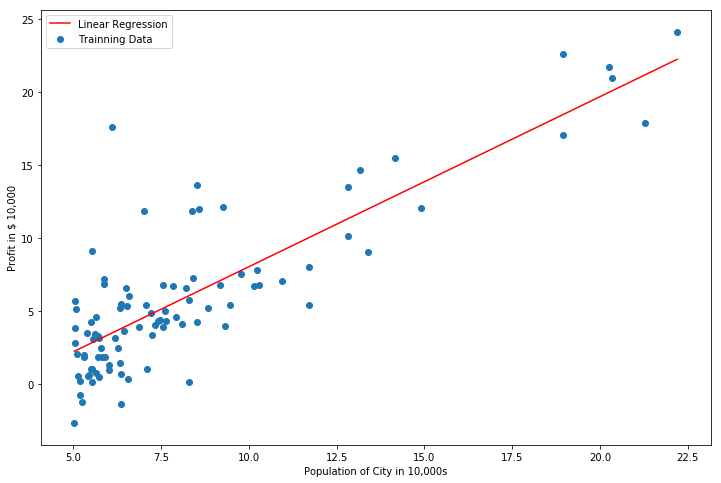

In [34]:
theta_0 = theta[0, 0]
theta_1 = theta[1, 0]
population = np.linspace(data.Population.min(), data.Population.max(), 1000)
profit = x * theta_1 + theta_0

plt.figure(figsize=(12, 8))
plt.plot(population, profit, 'r', label='Linear Regression')
plt.scatter(data.Population, data.Profit,label='Trainning Data') #可以直接传入不用更改类型
plt.legend(loc=2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $ 10,000')
plt.show()

In [23]:
data.Population.shape  #所以不用更改类型就可以传入

(97,)

### 3.3 代价数据可视化

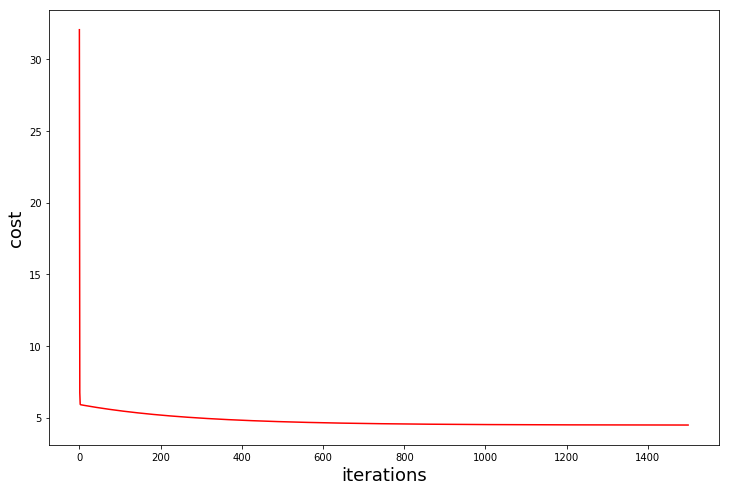

In [101]:
plt.figure(figsize=(12, 8))
plt.xlabel('iterations', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.plot(range(1500), cost, 'r') #1500次迭代
plt.show()

# 选修部分：Linear regression with multiple variables

In [36]:
path = 'ex1data2.txt'
mul_data = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price']) #加载数据
mul_data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 1. Featrue Normalization

In [58]:
mul_data = (mul_data - mul_data.mean()) / mul_data.std() #归一化，当然文档中也给出了除以max - min，也是可行的
mul_data.head()
# 根据文档提示，如果要进行预测需要先将数据的均值和方差记录下来

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [63]:
mul_data.insert(0, 'Ones', 1)
mul_colums = mul_data.shape[1]
mul_X = mul_data.iloc[:, 0:mul_colums-1]
mul_y = mul_data.iloc[:, mul_colums-1:mul_colums]

In [65]:
mul_data.shape, mul_X.shape, mul_y.shape

((47, 4), (47, 3), (47, 1))

## 2. Gradient Descent

In [98]:
#initializing parameters
mul_X = np.array(mul_X)
mul_y = np.array(mul_y)
mul_theta = np.zeros((3, 1))

#gradient descent
mul_cost, mul_parameters = gradetDescent(mul_X, mul_y, mul_theta)

After the 1th interations, cost is : 0.4893617021276597
After the 101th interations, cost is : 0.18280650519871153
After the 201th interations, cost is : 0.14810009029766488
After the 301th interations, cost is : 0.1378210159328493
After the 401th interations, cost is : 0.13368618563317541
After the 501th interations, cost is : 0.13195133775794732
After the 601th interations, cost is : 0.13121998900980156
After the 701th interations, cost is : 0.13091151866092546
After the 801th interations, cost is : 0.13078140376838285
After the 901th interations, cost is : 0.13072652008033955
After the 1001th interations, cost is : 0.13070336960771894
After the 1101th interations, cost is : 0.13069360451281722
After the 1201th interations, cost is : 0.13068948550061493
After the 1301th interations, cost is : 0.13068774806112168
After the 1401th interations, cost is : 0.13068701519220935
[[-1.00983052e-17]
 [ 8.84042349e-01]
 [-5.24551809e-02]]


### 2.1 visualize cost

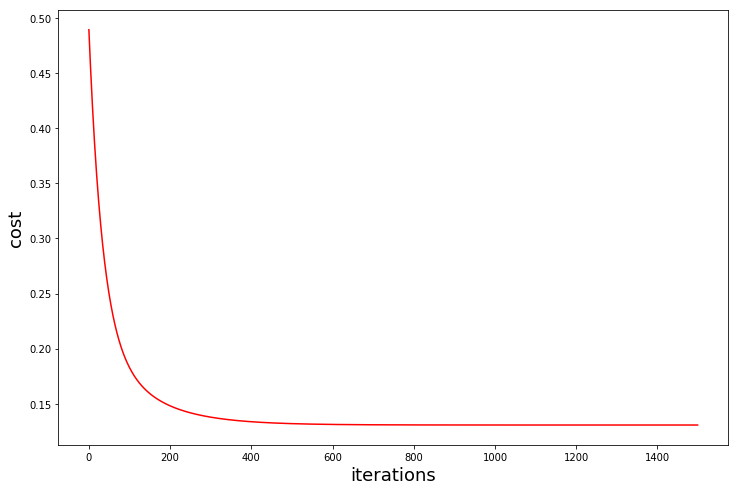

In [100]:
#visualize cost
plt.figure(figsize=(12, 8))
plt.xlabel('iterations', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.plot(range(1500), mul_cost, 'r')
plt.show()

### 2.2 Selecting learning rate

In [97]:
base = np.logspace(-4, -1, 4)
base = np.concatenate((base, base * 3)) #里面要写括号，两个数组作为一个参数，函数用来将两个数组合并（拼接）
base.sort()
base

array([1.e-04, 3.e-04, 1.e-03, 3.e-03, 1.e-02, 3.e-02, 1.e-01, 3.e-01])

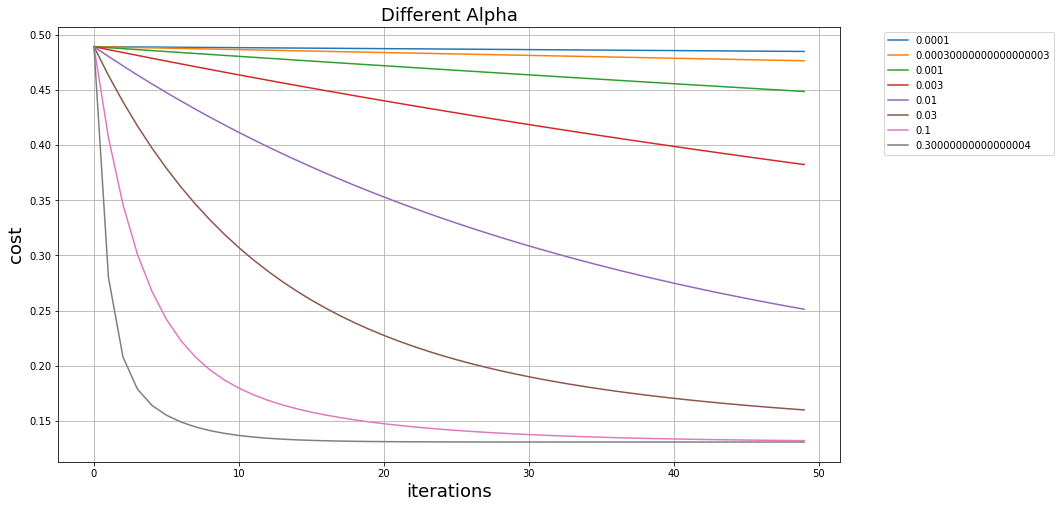

In [140]:
iters = 50 #参考文档

plt.figure(figsize=(14, 8))

for alpha in base:
    mul_theta = np.zeros((3, 1))  #重新初始化
    dif_alpha_cost, _ = gradetDescent(mul_X, mul_y, mul_theta, iterations=iters, alpha=alpha) #也可以传入mul_theta[:],传入副本就不用每次初始化
    plt.plot(range(iters), dif_alpha_cost, label=alpha)

plt.xlabel('iterations', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.title('Different Alpha', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) #线条标注
plt.grid(True)
plt.show()

## 3. Normal Equation

正规方程公式：$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$  
  
  
梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型  
  
  
正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [129]:
def normalEqn(X, y):
    temp = np.mat(np.dot(X.T, X)).I #利用矩阵自带的求逆属性
    theta = np.dot(np.dot(np.array(temp), X.T), y)
    return theta

In [133]:
theta = normalEqn(X, y)
theta

array([[-3.89578088],
       [ 1.19303364]])

In [134]:
parameter #之前1500次迭代的答案

array([[-3.63029144],
       [ 1.16636235]])

可以看得出来，两者还是有点差距的，不知道增加迭代次数会不会让两者更加接近